In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from scipy.stats import beta, norm
from scipy.special import beta as beta_function
from scipy.special import gamma as gamma_function


### Task 1
Find π with Monte-Carlo.

In [3]:
def approx_pi(n):
    # Given number of samples n returns an approximation of \pi
    x = np.random.uniform(low = 0, high = 2, size = n)
    y = np.random.uniform(low = 0, high = 2, size = n)

    def if_in_circle(x, y):
      return (x - 1) ** 2 + (y - 1) ** 2 <= 1

    sample = if_in_circle(x, y)
    return sample.mean() * 4

In [4]:
smoothing_itertions_num = 100
M = 23
error = np.zeros(M)
for _ in tqdm(range(smoothing_itertions_num)):

    ms = np.arange(0, M)
    ns = [2 ** i for i in ms]
    approxis = np.array([approx_pi(n) for n in ns ])
    error += np.abs(approxis - np.pi)
error /= smoothing_itertions_num

100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


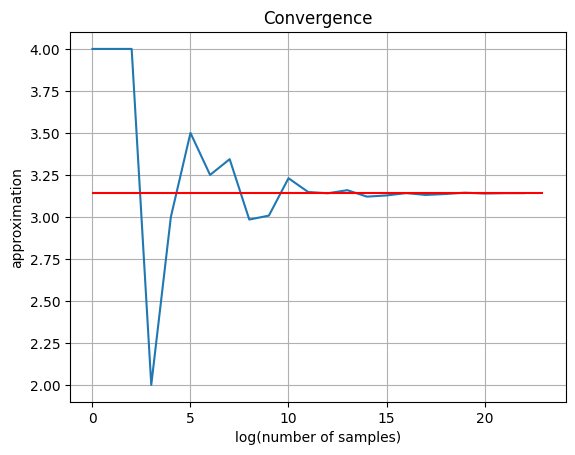

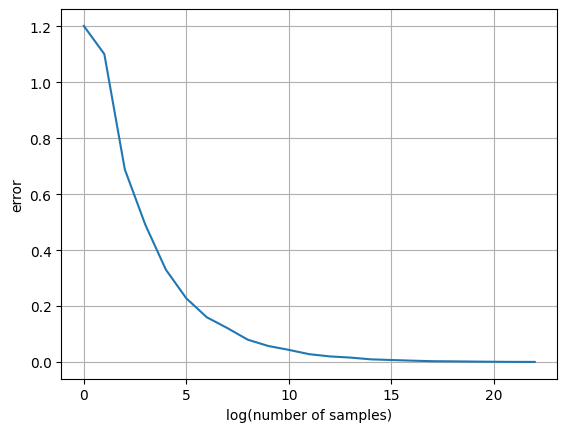

In [5]:
plt.plot(ms, approxis)
plt.title("Convergence")
plt.xlabel('log(number of samples)')
plt.ylabel('approximation')
plt.hlines(np.pi, 0, M, color='red')
plt.grid(True)
plt.show()


plt.plot(ms, error)
plt.xlabel('log(number of samples)')
plt.ylabel('error')
plt.grid(True)
plt.show()

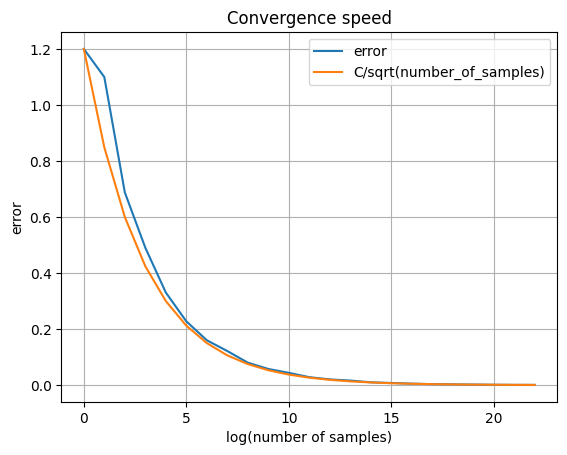

In [7]:
plt.plot(ms, error, label = 'error')
plt.title("Convergence speed")
plt.plot(ms, 1/np.sqrt(2**ms) * error[0], label = 'C/sqrt(number_of_samples)')
plt.xlabel('log(number of samples)')
plt.ylabel('error')
plt.grid(True)
plt.legend()
plt.show()

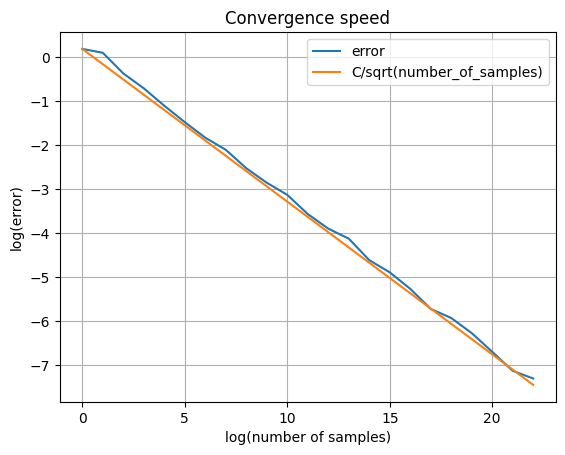

In [6]:
plt.plot(ms, np.log(error), label = 'error')
plt.title("Convergence speed")
plt.plot(ms, np.log(1/np.sqrt(2**ms) * error[0]), label = 'C/sqrt(number_of_samples)')
plt.xlabel('log(number of samples)')
plt.ylabel('log(error)')
plt.grid(True)
plt.legend()
plt.show()

### Task 2

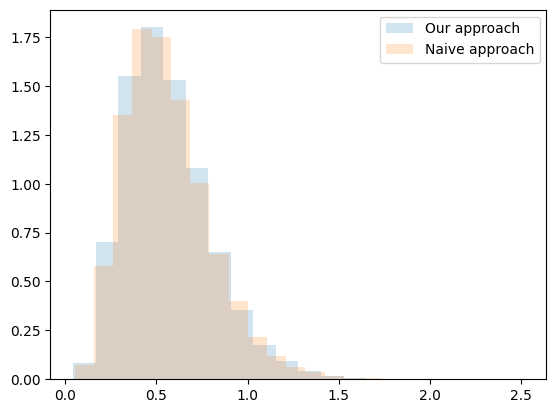

In [10]:
k, n = 6, 10
lam = 1.5
N = 100_000
def uni_to_exp(u, lam):
    return -np.log(1-u) / lam

# Our approach
U_k = np.random.beta(k,n + 1 - k,N)
Exp_k = uni_to_exp(U_k, lam)
plt.hist(Exp_k, bins=20, density=True, label = 'Our approach', alpha=0.2)

# Naïve approach
U = np.random.uniform(size = (N, n))
E = uni_to_exp(U, lam)
E = np.sort(E, axis=-1)#np.sort(E, axis=-1)
Exp_k_naive = E[:, k-1]
plt.hist(Exp_k_naive, bins=20, density=True, label = 'Naive approach', alpha=0.2)
plt.legend()
plt.show()


In [11]:
stats.ks_2samp(Exp_k, Exp_k_naive)

KstestResult(statistic=np.float64(0.005600000000000049), pvalue=np.float64(0.0865809702554724), statistic_location=np.float64(0.6489427378081272), statistic_sign=np.int8(-1))

### Task 3

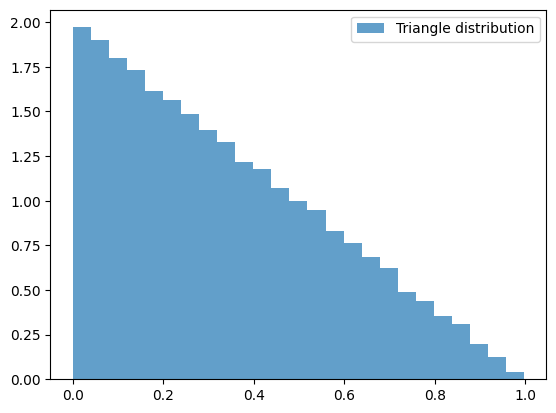

In [12]:
N = 100_000
U = np.random.uniform(size=N)
def uniform_to_triangle(u):
    return 1 - np.sqrt(u)
X = uniform_to_triangle(U)
plt.hist(X, bins=25, density=True, label = 'Triangle distribution', alpha=0.7)
plt.legend()
plt.show()

### Task 4

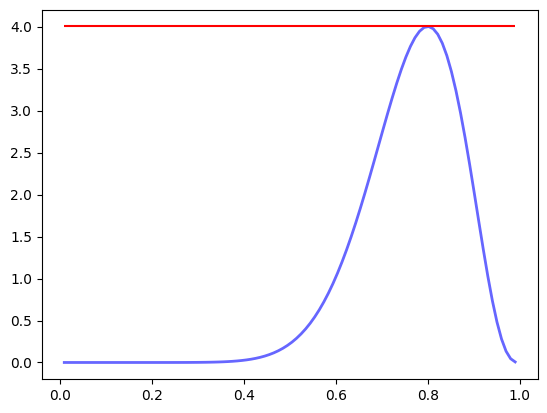

In [ ]:
a, b = 13, 4 # >=1
def c_opt(a, b):
    return ((a-1)/(a+b-2)) ** (a-1) * ((b-1)/(a+b-2)) ** (b-1) / beta_function(a,b)
x = np.linspace(0.01, 0.99, 100)
plt.plot(x, beta.pdf(x, a, b), 'b-', lw=2, alpha=0.6, label='beta pdf')
plt.hlines(c_opt(a,b), 0.01,0.99, 'red')
plt.show()

In [11]:
class Uniform_my:
    def __init__(self) -> None:
        pass

    def density(self, x):
        return 1

    def sample(self):
        return np.random.uniform()
beta_pdf = lambda x: beta.pdf(x, a, b)

def AR(f, g, g_sampler, c, N):
    samples = []
    samples_counter = 0
    for i in tqdm(range(N)):
        samples_counter += 1
        U = np.random.uniform()
        X = g_sampler.sample()
        # print(f'U={U}, c = {c}, g(X) = {g(X)}, f(X) = {f(X)}')
        while U * c * g(X) > f(X):
            samples_counter += 1
            U = np.random.uniform()
            X = g_sampler.sample()
        samples.append(X)
    return np.array(samples), N / samples_counter


In [12]:
N = 10000
uni = Uniform_my()
samples_beta, access_ratio = AR(beta_pdf, uni.density, uni, c_opt(a, b), N)

100%|██████████| 10000/10000 [00:06<00:00, 1495.74it/s]


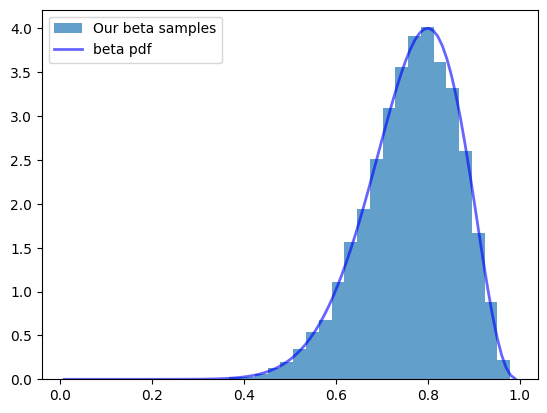

access_ratio = 0.24694406716878628


In [13]:
x = np.linspace(0.01, 0.99, 100)
plt.hist(samples_beta, bins=25, density=True, label = 'Our beta samples', alpha=0.7)
plt.plot(x, beta.pdf(x, a, b), 'b-', lw=2, alpha=0.6, label='beta pdf')
plt.legend()
plt.show()

# stats.ks_2samp(samples_beta, np.random.beta(a, b, N))
print(f'access_ratio = {access_ratio}')

### Task 5
$A^{-1} = \Gamma(\frac{1}{4}) / \sqrt{2}$

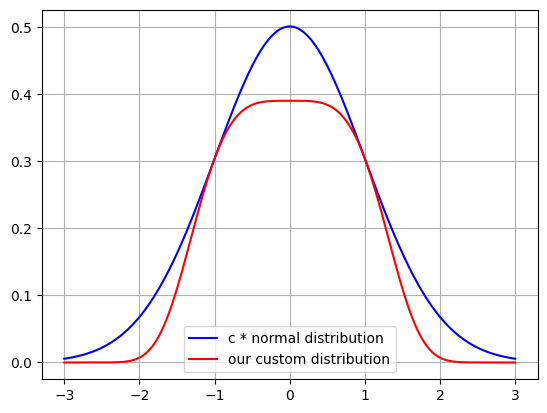

In [14]:
A_ = gamma_function(1/4) / np.sqrt(2)
sigma = 1
class Normal_my:
    def __init__(self, sigma) -> None:
        self.sigma = sigma
        pass

    def density(self, x):
        return norm.pdf(x, 0, self.sigma)

    def sample(self):
        return np.random.normal(loc=0,scale=self.sigma)

def custom_density(x):
    A_ = gamma_function(1/4) / np.sqrt(2)
    return np.exp(-x**4/4) / A_

def c_optimal_task_5(sigma):
    A = 1 / (gamma_function(1/4) / np.sqrt(2))
    return np.sqrt(2*np.pi) * sigma * A * np.exp(1 / (4 * sigma ** 2))

my_normal = Normal_my(sigma)
c = c_optimal_task_5(sigma)
x = np.linspace(-3, 3, 200)

plt.plot(x, c * my_normal.density(x), color = 'blue', label = 'c * normal distribution')
plt.plot(x, custom_density(x), color = 'red', label = 'our custom distribution')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
N = 100_000
samples_custom, access_ratio = AR(custom_density, my_normal.density, my_normal, c, N)

100%|██████████| 100000/100000 [00:19<00:00, 5238.72it/s]


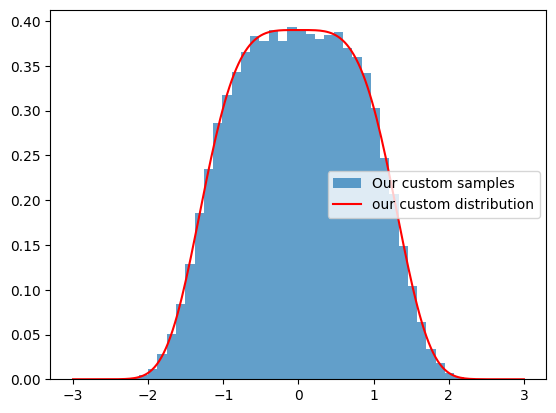

c = 1.2554443815412533, access_ratio = 0.7967175238019361


In [16]:
plt.hist(samples_custom, bins=40, density=True, label = 'Our custom samples', alpha=0.7)
plt.plot(x, custom_density(x), color = 'red', label = 'our custom distribution')
plt.legend()
plt.show()
print(f'c = {c}, access_ratio = {access_ratio}')

### Task 6

In [17]:
Normal_pdf = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * Normal_pdf(d1) - K * np.exp(-r*T)* Normal_pdf(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*Normal_pdf(-d2) - S*Normal_pdf(-d1)

def CALL_sampling(S, K, T, r, sigma, N):
    Z = np.random.normal(size = N)
    S_T = S * np.exp((r - sigma ** 2 / 2) * T + sigma * np.sqrt(T) * Z)
    Call = np.max([S_T - K, np.zeros(N)], axis=0)
    return Call.mean() * np.exp(- r * T)

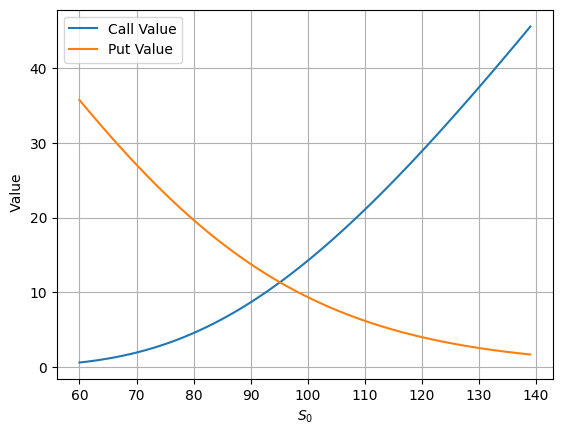

In [18]:
K = 100
r = 0.05
T = 1
sigma = 0.3

S = np.arange(60,140,1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.grid(True)
plt.legend()

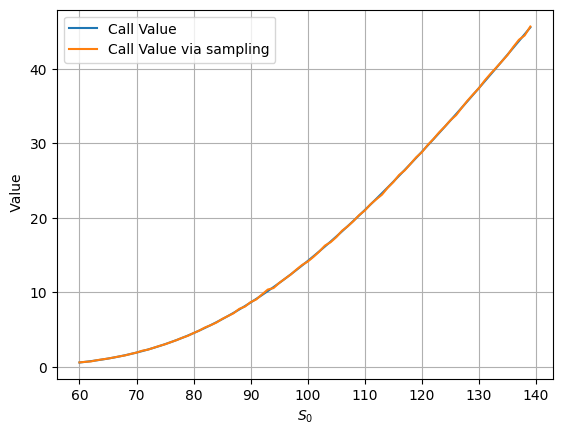

In [19]:
N = 100_000
calls = [BS_CALL(s, K, T, r, sigma) for s in S]
calls_sampling = [CALL_sampling(s, K, T, r, sigma, N) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, calls_sampling, label='Call Value via sampling')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.grid(True)
plt.legend()

### Forward-starting call option
 We have two tenors $T_1$ and $T_2$. At $T_1$ we fix the price of an asset $S_{T_1}$. And at $T_2$ payoff is $(S_{T_2} - S_{T_1})_+$.
 Unfortunately there is no analytical expression for the PV of such a contract. But we have no need!

In [20]:
def Forward_starting_call_sampling(S, K, T1, T2, r, sigma, N):
    if T2 <= T1:
        print(f'T1 >= T2 with values T1 = {T1} and T2 = {T2}')
    Z1 = np.random.normal(size = N)
    Z2 = np.random.normal(size = N)
    S_T1 = S * np.exp((r - sigma ** 2 / 2) * T1 + sigma * np.sqrt(T1) * Z1)
    S_T2 = S_T1 * np.exp((r - sigma ** 2 / 2) * (T2-T1) + sigma * np.sqrt((T2-T1)) * Z2)
    Call = np.max([S_T2 - S_T1, np.zeros(N)], axis=0)
    return Call.mean() * np.exp(- r * T2)

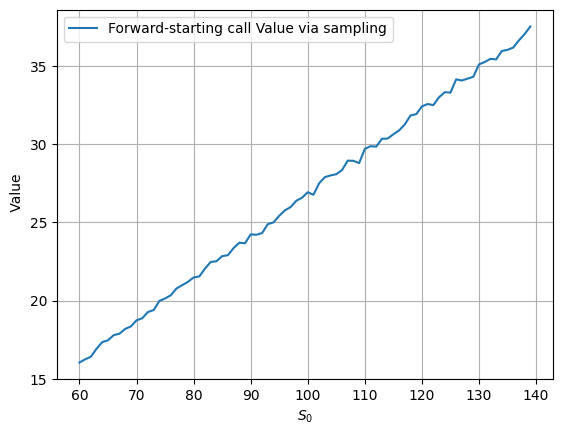

In [21]:
N = 100_000
T1 = 1
T2 = 4
# calls = [BS_CALL(s, K, T, r, sigma) for s in S]
calls_sampling = [Forward_starting_call_sampling(s, K, T1, T2, r, sigma, N) for s in S]
# plt.plot(S, calls, label='Call Value')
plt.plot(S, calls_sampling, label='Forward-starting call Value via sampling')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.grid(True)
plt.legend()